# Data cleaning

### Loading data

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
from pandas.plotting import autocorrelation_plot

### Changing to multi index with time and ID
We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [44]:
#Import
data = pd.read_csv('dataset_mood_smartphone.csv')
print(len(data))

# Clea invalid responses
data = data.loc[(((data.value >= 1) & (data.value <= 10))|(data.variable != 'mood'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.arousal'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.valence'))]
print(len(data))
data = data.loc[(((data.value >= 0) & (data.value <= 1))|(data.variable != 'activity'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'screen'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'call'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'sms'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.communication'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.entertainment'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.finance'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.game'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.office'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.other'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.social'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.travel'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.unknown'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.utilities'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.weather'))]
print(len(data))

376912
376912
376866
376710
376710
376710
376710
376710
376710
376709
376709
376709
376709
376709
376709
376709
376709
376709
376709


In [45]:
#Convert time column to date time format
data['time']= pd.to_datetime(data['time']) 
data = data.set_index(['id', 'time'])
data_formated = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')

### Summing rows for each 3 hours.  

How are we classifying a day?  I would classify the start of the day as when the person wakes up.  Therefor, the average of the day would be fine, but we would need to do something about the overnight times....  Maybe by classifying them as whole days even though we only take 3 hour chunks, we can add a column for not only the day of the week but also for hours of sleep, and if it was uninterupted?  This could be done by checking when the last phone usuage is between the hours of 10-3 with at least a 3 hour gap between?  to find if it was uninterupted check to see if past this time and before the high use time again?

Alternativly commbine the two into a last used and first used for each day? and we can add a statement that if the time is lesss than 5 hours that sleep wasnt restful?



In [51]:
date_list = data_formated.index.levels[1].tolist()
print(len(date_list))
data_formated

336906


variable                         activity  appCat.builtin  \
id      time                                                
AS14.01 2014-02-17 12:04:42.394       NaN             NaN   
        2014-02-17 18:28:25.520       NaN             NaN   
        2014-02-18 09:29:51.257       NaN             NaN   
        2014-02-19 14:43:30.575       NaN             NaN   
        2014-02-19 17:29:10.378       NaN             NaN   
        2014-02-19 17:42:16.499       NaN             NaN   
        2014-02-19 17:42:34.292       NaN             NaN   
        2014-02-19 17:43:18.061       NaN             NaN   
        2014-02-19 17:44:01.594       NaN             NaN   
        2014-02-19 18:07:50.055       NaN             NaN   
        2014-02-19 18:10:06.385       NaN             NaN   
        2014-02-19 21:25:04.397       NaN             NaN   
        2014-02-20 10:58:33.924       NaN             NaN   
        2014-02-20 11:13:44.448       NaN             NaN   
        2014-02-20 11:16:45.930       NaN             NaN   
        2014-02-20 13:42:05.309       NaN             NaN   
        2014-02-20 13:42:56.997       NaN             NaN   
        2014-02-21 15:36:58.253       NaN             NaN   
        2014-02-22 17:34:44.325       NaN             NaN   
        2014-02-22 18:17:55.618       NaN             NaN   
        2014-02-22 22:32:39.631       NaN             NaN   
        2014-02-25 11:27:52.973       NaN             NaN   
        2014-02-25 11:38:26.127       NaN             NaN   
        2014-02-25 12:29:25.009       NaN             NaN   
        2014-02-26 13:00:00.000       NaN             NaN   
        2014-02-26 15:00:00.000       NaN             NaN   
        2014-02-26 16:19:04.586       NaN             NaN   
        2014-02-26 18:00:00.000       NaN             NaN   
        2014-02-26 18:10:37.734       NaN             NaN   
        2014-02-26 21:00:00.000       NaN             NaN   
...                                   ...             ...   
AS14.33 2014-05-30 21:58:51.395       NaN           3.018   
        2014-05-30 21:58:54.421       NaN             NaN   
        2014-05-30 21:59:57.865       NaN          21.075   
        2014-05-30 22:00:00.000     0.375             NaN   
        2014-05-30 22:00:18.943       NaN          72.213   
        2014-05-30 22:01:31.157       NaN           1.016   
        2014-05-30 22:01:32.177       NaN           3.019   
        2014-05-30 22:01:35.197       NaN          25.076   
        2014-05-30 22:02:00.275       NaN             NaN   
        2014-05-30 22:02:24.378       NaN          23.085   
        2014-05-30 22:02:47.464       NaN          27.386   
        2014-05-30 22:03:14.875       NaN           4.016   
        2014-05-30 22:03:19.157       NaN          13.045   
        2014-05-30 22:03:32.207       NaN           2.004   
        2014-05-30 22:03:34.213       NaN          47.219   
        2014-05-30 22:04:21.434       NaN           7.018   
        2014-05-30 22:04:28.453       NaN             NaN   
        2014-05-30 22:04:31.486       NaN          22.076   
        2014-05-30 22:04:53.562       NaN          71.257   
        2014-05-30 22:06:04.821       NaN           3.005   
        2014-05-30 22:06:07.826       NaN             NaN   
        2014-05-30 22:07:36.256       NaN           1.266   
        2014-05-30 22:18:11.591       NaN             NaN   
        2014-05-30 22:31:07.964       NaN             NaN   
        2014-05-30 22:32:00.898       NaN           4.072   
        2014-05-30 22:32:05.016       NaN             NaN   
        2014-05-30 22:32:11.049       NaN           3.122   
        2014-05-30 22:32:14.240       NaN           1.003   
        2014-05-30 22:32:15.246       NaN           4.134   
        2014-05-31 12:00:00.000       NaN             NaN   

variable                         appCat.communication  appCat.entertainment  \
id      time                                                                 

In [48]:
#each person each day

data1D_indiv =  data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})


#data1D_indiv = data1D_indiv.dropna(subset=['mood'])
data1D_indiv.fillna(value = 0, inplace=True)
id_list = data1D_indiv.index.levels[0].tolist()
df_list = []
for cur_id in id_list:
    print(cur_id)
    df_personal = data1D_indiv.loc[data1D_indiv.index.get_level_values('id') == cur_id]
    for i in range(1,len(df_personal.index)-1):
        #print((df_personal['mood'].iloc[i]))
        if df_personal['mood'].iloc[i] == 0:
            #print('Are we here')
            if df_personal['mood'].iloc[i-1] != 0 and df_personal['mood'].iloc[i+1] != 0:
                print("found one")
                df_personal['mood'].iloc[i] = ((df_personal['mood'].iloc[i-1]+df_personal['mood'].iloc[i+1])/2)
                
mood_daily = data1D_indiv['mood']
#print(len(mood_daily))
mood_only = pd.DataFrame(mood_daily.dropna())


#Aggrigated each day

data1D_agg =  data_formated.groupby([pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

print("doing the full range now")
data1D_agg.fillna(value = 0, inplace=True)

for i in range(1,len(data1D_agg.index)-1):
    #print((df_personal['mood'].iloc[i]))
    if data1D_agg['mood'].iloc[i] == 0:
        #print('Are we here')
        if data1D_agg['mood'].iloc[i-1] != 0 and data1D_agg['mood'].iloc[i+1] != 0:
            print("found one")
            data1D_agg['mood'].iloc[i] = ((data1D_agg['mood'].iloc[i-1]+data1D_agg['mood'].iloc[i+1])/2)

data1D_agg['mood'].loc['2014-05-06'] = (data1D_agg['mood'].loc['2014-05-05']+data1D_agg['mood'].loc['2014-05-07'])/2

data1D_agg = data1D_agg.dropna(subset=['mood'])

AS14.01
AS14.02
AS14.03
found one
AS14.05
AS14.06

/home/jordan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



found one
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
found one
AS14.15
found one
AS14.16
found one
AS14.17
found one
AS14.19
AS14.20
AS14.23
found one
AS14.24
found one
AS14.25
found one
AS14.26
found one
AS14.27
found one
AS14.28
found one
AS14.29
found one
found one
AS14.30
AS14.31
AS14.32
found one
found one
found one
AS14.33
found one
doing the full range now
found one


In [50]:
# Remove non-adjacent for aggregate of all with "fixing" for every catagory
from datetime import datetime, timedelta

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

#df_tmp = data1D_agg
df_tmp = data1D_agg
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']
df_tmp = df_tmp.dropna(subset=['mood'])

print(len(df_tmp))

for i in range(1,len(df_tmp)-1):
    #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
    if (df_tmp.index[i-1] == (df_tmp.index[i] - timedelta(days=1))) and (df_tmp.index[i+1] == (df_tmp.index[i] + timedelta(days=1))):
        #print('adding to length')
        cur_end = i
        cur_len += 1
    elif cur_len>lon_len:
        #print("broken on" + str(df_tmp.index[i]))
        #print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0
    else:
        #print("broken on" + str(df_tmp.index[i]))
        cur_start = i+1
        cur_end = i+1

if cur_len>lon_len:
        #print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0

# print(len(df_tmp))
# print(lon_len)

# print(lon_start)
# print(lon_end)

window = 5

data1D_agg_limited = df_tmp.iloc[lon_start:lon_end]
print(len(data1D_agg_limited))

113
111


time
2014-05-01    7.108108
2014-05-02    7.191919
2014-05-03    7.061224
2014-05-04    7.168421
2014-05-05    6.890411
2014-05-06         NaN
2014-05-07    6.862069
2014-05-08    6.875000
2014-05-09    6.750000
2014-05-10    7.264706
2014-05-11    6.794118
2014-05-12    7.029412
2014-05-13    7.115385
2014-05-14    6.666667
2014-05-15    6.421053
Freq: D, Name: mood, dtype: float64
time
2014-05-01    7.108108
2014-05-02    7.191919
2014-05-03    7.061224
2014-05-04    7.168421
2014-05-05    6.890411
2014-05-06    6.876240
2014-05-07    6.862069
2014-05-08    6.875000
2014-05-09    6.750000
2014-05-10    7.264706
2014-05-11    6.794118
2014-05-12    7.029412
2014-05-13    7.115385
2014-05-14    6.666667
2014-05-15    6.421053
Name: mood, dtype: float64
99


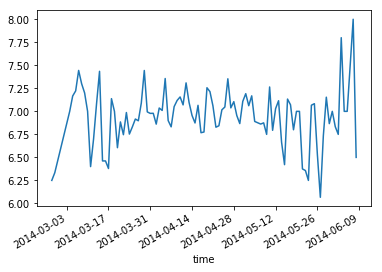

In [32]:
# Rollinng averages for aggregate of all with "fixing" for every catagory
from datetime import datetime, timedelta

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

#df_tmp = data1D_agg
df_tmp = data1D_agg
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']
df_tmp = df_tmp.dropna(subset=['mood'])

print(len(df_tmp))

for i in range(1,len(df_tmp)-1):
    #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
    if (df_tmp.index[i-1] == (df_tmp.index[i] - timedelta(days=1))) and (df_tmp.index[i+1] == (df_tmp.index[i] + timedelta(days=1))):
        #print('adding to length')
        cur_end = i
        cur_len += 1
    elif cur_len>lon_len:
        print("broken on" + str(df_tmp.index[i]))
        #print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0
    else:
        print("broken on" + str(df_tmp.index[i]))
        cur_start = i+1
        cur_end = i+1

if cur_len>lon_len:
        print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0

print(len(df_tmp))
print(lon_len)

print(lon_start)
print(lon_end)

window = 5

df_continuous = df_tmp.iloc[lon_start:lon_end]

df_mood_store = pd.DataFrame(copy.deepcopy(df_continuous['mood']))

df_new_mood = copy.deepcopy(df_mood_store)
offset = window-1
for i in range(0,len(df_mood_store)):
    if i < len(df_mood_store)-offset:
        df_new_mood.iloc[i] = df_mood_store.iloc[i+offset]
    else:
        df_new_mood.iloc[i] = np.nan
        
df_new_mood.head()

rolling_cont_unfluffed = df_continuous.rolling(window, min_periods = window).sum()
rolling_cont_unfluffed = rolling_cont_unfluffed.dropna()
rolling_cont_unfluffed = rolling_cont_unfluffed.drop(ave_list, axis = 1)
rolling_cont_unfluffed = pd.concat([rolling_cont_unfluffed,df_continuous[ave_list].rolling(window, min_periods = window).mean()], axis = 1)
rolling_cont_unfluffed = rolling_cont_unfluffed.drop(['mood'], axis = 1)
rolling_cont_unfluffed.head()
rolling_cont_unfluffed = pd.concat([rolling_cont_unfluffed,df_new_mood], axis = 1)
rolling_cont_unfluffed = rolling_cont_unfluffed.iloc[window-1:]

print(len(rolling_cont_unfluffed))
agg_rolling_all = rolling_cont_unfluffed

In [ ]:
# Personal Rollinng averages for aggregate for every catagory
from datetime import datetime, timedelta


ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

df_tmp = data1D_indiv

df_tmp = df_tmp.dropna(subset=['mood'])

id_list = df_tmp.index.levels[0].tolist()

df_list = []

for cur_id in id_list:
    print(cur_id)
    lon_len = 0
    lon_start = 0
    lon_end = 0
    cur_len = 0
    cur_start = 0
    cur_end = 0
    df_personal_roll = df_tmp.loc[df_tmp.index.get_level_values('id') == cur_id]
    for i in range(1,len(df_personal_roll.index)-1):
        #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
        if (df_personal_roll.index[i-1][1] == (df_personal_roll.index[i][1] - timedelta(days=1))) and (df_personal_roll.index[i+1][1] == (df_personal_roll.index[i][1] + timedelta(days=1))):
            #print('adding to length')
            cur_end = i
            cur_len += 1
        elif cur_len>lon_len:
            #print("broken on" + str(df_personal_roll.index[i][1]))
            #print(cur_len)
            lon_len = cur_len
            lon_start = cur_start
            lon_end = cur_end
            cur_start = i+1
            cur_end = i+1
            cur_len = 0
        else:
            #print("broken on" + str(df_personal_roll.index[i][1]))
            cur_start = i+1
            cur_end = i+1

    if cur_len>lon_len:
            #print(cur_len)
            lon_len = cur_len
            lon_start = cur_start
            lon_end = cur_end
            cur_start = i+1
            cur_end = i+1
            cur_len = 0

#     print(len(mood_agg))
    print(lon_len)

#     print(lon_start)
#     print(lon_end)

    df_continuous = df_personal_roll.iloc[lon_start:lon_end]
    #print(df_continuous.head())
    
    df_mood_store = copy.deepcopy(df_continuous['mood'])
    df_new_mood = df_mood_store
    for i in range(0,len(df_mood_store)):
        if i < len(df_mood_store)-4:
            df_new_mood.iloc[i] = df_mood_store[i+4]
        else:
            df_new_mood.iloc[i] = np.nan

    window = 5

    rolling_personal = df_continuous.rolling(window, min_periods = window).sum()
    rolling_personal = rolling_personal.dropna()
    rolling_personal = rolling_personal.drop(ave_list, axis = 1)
    rolling_personal = pd.concat([rolling_personal,df_continuous[ave_list].rolling(window, min_periods = window).mean()], axis = 1)
    rolling_personal = rolling_personal.drop(['mood'], axis = 1)
    rolling_personal = pd.concat([rolling_personal,df_new_mood], axis = 1)
    rolling_personal = rolling_personal.iloc[window-1:]
    
    df_list.append(rolling_personal)
    
combined = pd.concat(df_list)

agg_rolling_indi = combined

1973


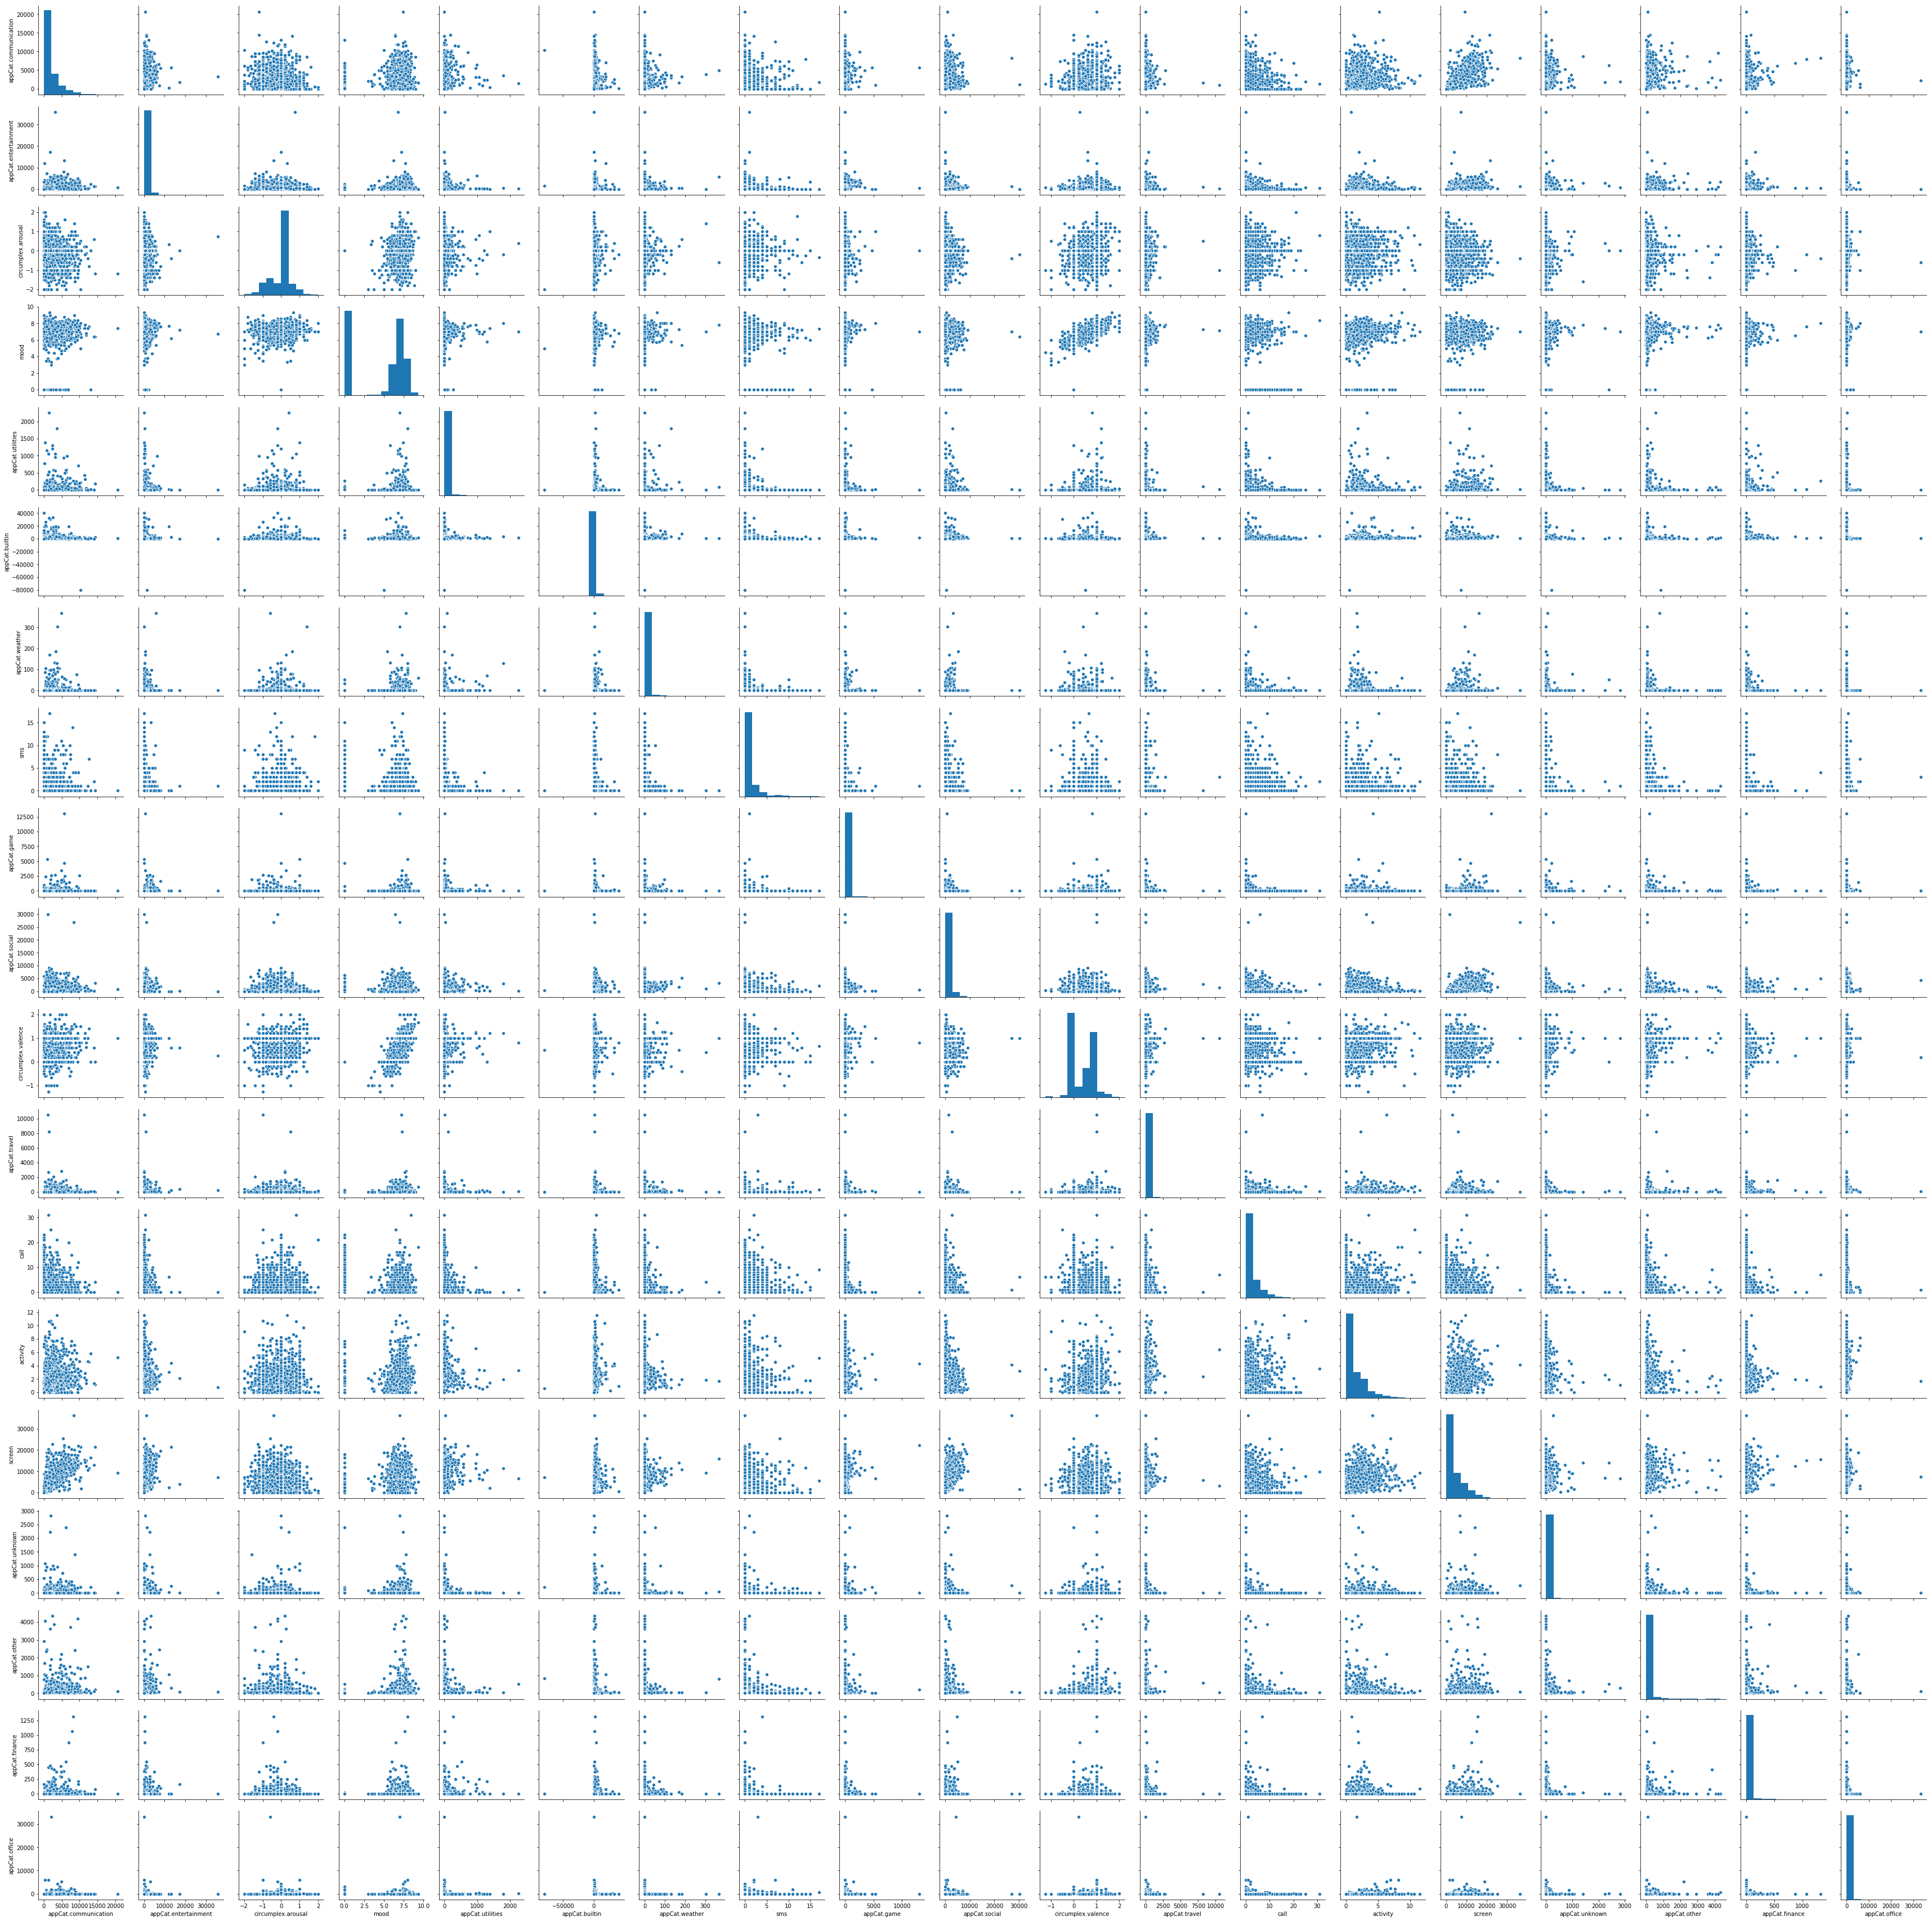

In [36]:
print(len(data1D))

data1D.fillna(value = 0, inplace=True)

#mood_agg = pd.DataFrame(data1D_agg['mood'].dropna())
#autocorrelation_plot(mood_agg)
sns.pairplot(data1D.loc[:,data1D.dtypes == 'float64'])


In [ ]:
for index in mood_only.index.levels[0].tolist():   
    mood_only.loc[(index)].hist()
    plt.title(index)

In [ ]:
for index in mood_only.index.levels[0].tolist():   
    mood_only.loc[(index)].hist()
    plt.title(index)

/home/jordan/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


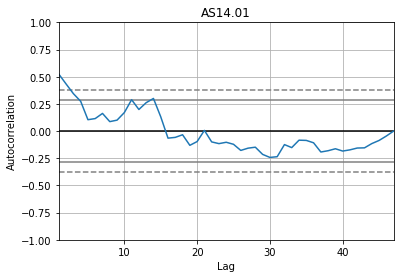

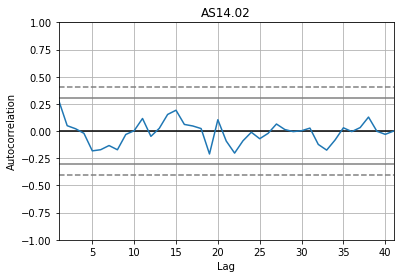

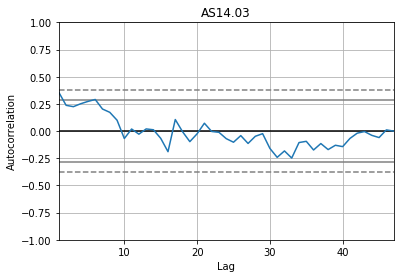

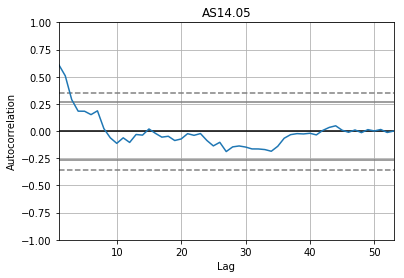

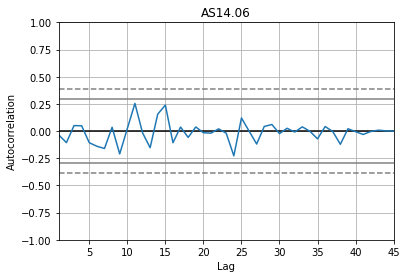

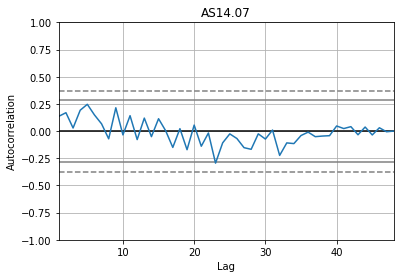

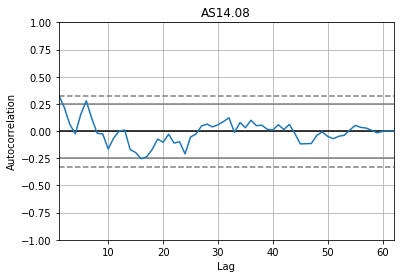

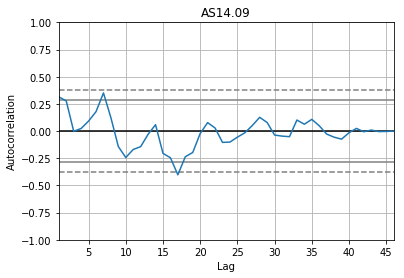

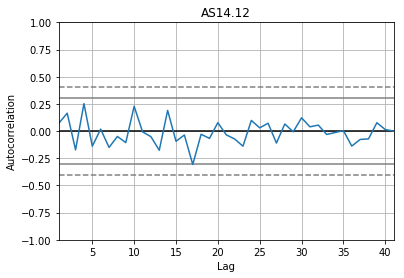

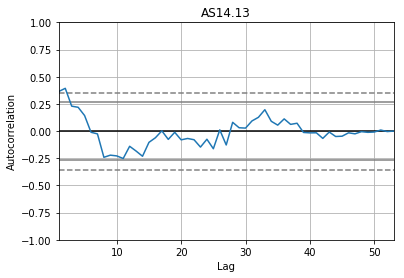

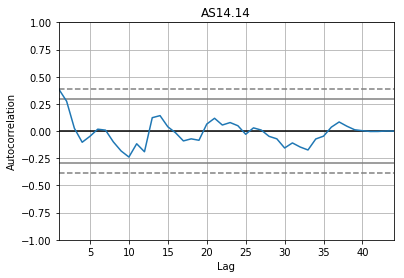

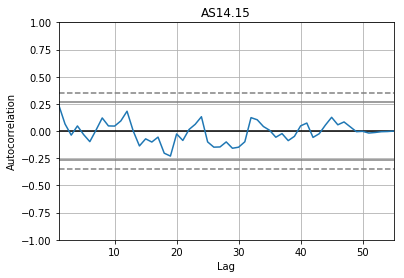

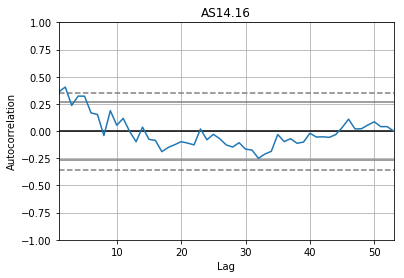

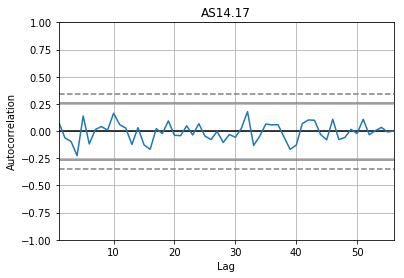

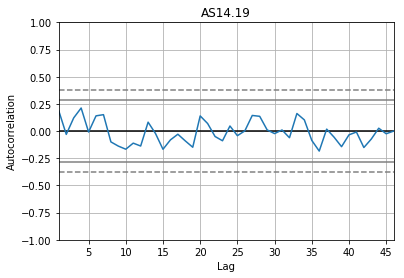

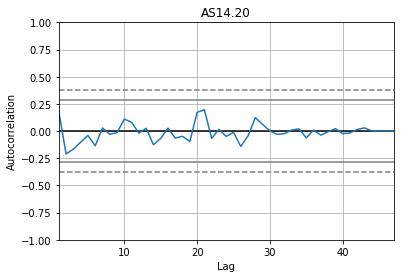

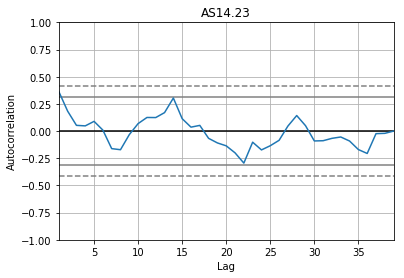

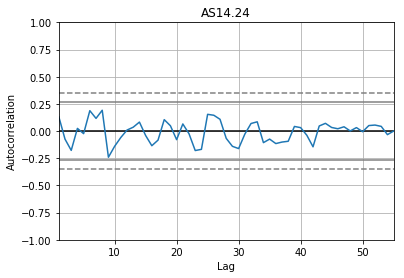

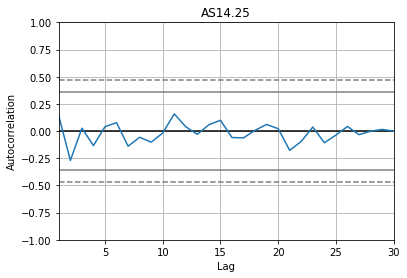

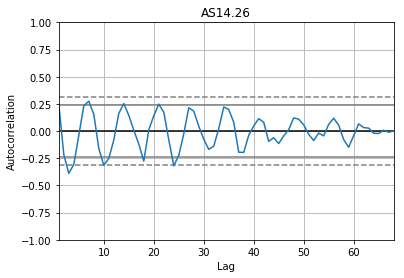

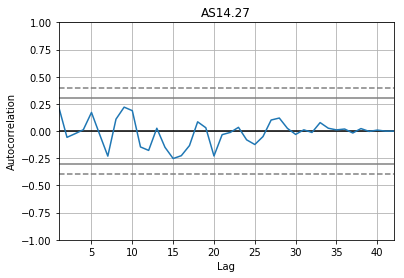

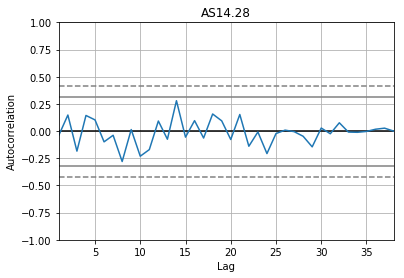

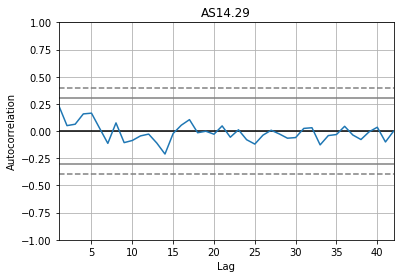

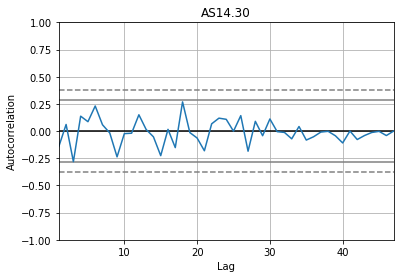

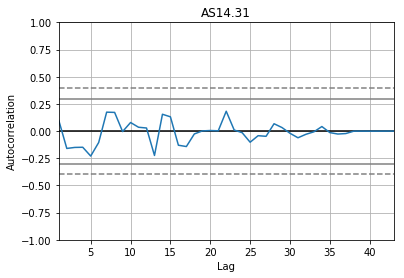

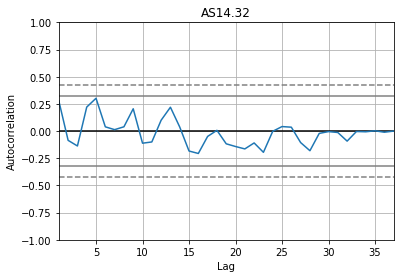

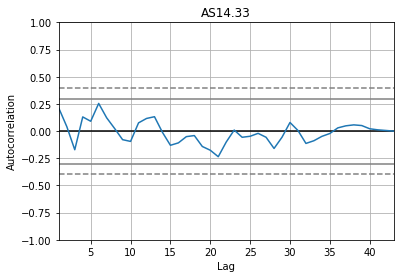

In [7]:
#mood_only.plot.line()

#autocorrelation_plot(mood_only.loc[(index)])

for index in mood_only.index.levels[0].tolist():
    #mood_only.loc[(index)].plot.line()
    plt.figure()
    autocorrelation_plot(mood_only.loc[(index)])
    plt.title(index)
    
#mood_only.loc[(['AS14.01']),:].plot.scatter()

In [ ]:
from pandas.plotting import autocorrelation_plot

for column in list(data1D.columns.values):
    test_test = pd.DataFrame(data1D[column].dropna())
    for index in test_test.index.levels[0].tolist():
        #mood_only.loc[(index)].plot.line()
        plt.figure()
        autocorrelation_plot(test_test.loc[(index)])
        plt.title(str(index) + str(column))

In [ ]:
for index in mood_only.index.levels[0].tolist():
    #mood_only.loc[(index)].plot.line()
    plt.figure()
    mood_only.loc[([index]),:].plot()
    plt.title(index)
    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
series = mood_only.loc[('AS14.05')]
# fit model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#Make copy of data
data3 = copy.deepcopy(data_formated)

#Setup new frame
df = pd.DataFrame(columns=data3.columns)

df.insert(0,'date', "")
df.insert(0,'id', "")
df_lost = copy.deepcopy(df)

prev_id = data3.index[0][0]
i_prev = 0
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

tmp = []
##This takes around an hour and change.  Do not run unless you have to
for i in range(0, len(data3)):
    #print(i)
    if data3.index[i][0] != prev_id or data3.index[i_prev][1] != data3.index[i][1]:
        for k in range(i_prev, i):
            tmp.append(data3.index[i_prev][0])
            tmp.append(data3.index[k][1])
            for j in range(0, len(data3.columns)):
                tmp.append(data3.iloc[k,j])
            #print(len(tmp))
            df_lost.loc[len(df_lost)] = tmp
            tmp = []
        i_prev = i
        prev_id = data3.index[i][0]
    if not pd.isnull(data3['mood'].iloc[i]):
        tmp.append(data3.index[i_prev][0])
        tmp.append(data3.index[i][1])
        for j in range(0, len(data3.columns)):
            if any(data3.columns[j] in s for s in ave_list):
                tmp.append(data3.iloc[i_prev:i+1,j].mean())
            else:
                tmp.append(data3.iloc[i_prev:i+1,j].sum())
        df.loc[len(df)] = tmp
        tmp = []
        i_prev = i+1
print("done")

In [ ]:
df.to_csv("mood_average.csv")
df_lost.to_csv("dropped.csv")

In [ ]:
df

In [ ]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days = copy.deepcopy(df)

for name in names:
    df_days[name] = 0
    for i in range(0, len(df_days)):
        if df_days.loc[i,'date'].weekday() == names.index(name):
            df_days.loc[i, name] = 1
    
df_days.head()

In [ ]:
# Reorder so mood is at the end
cols = df_days.columns.tolist()
cols.remove('mood')
cols.append('mood')
df_days_reordered = df_days[cols]

In [ ]:
df_days_reordered.head()

### Aggregating the data into time windows 

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [9]:
# Rollinng averages for aggregate of all in one
from datetime import datetime, timedelta

mood_agg = pd.DataFrame(data1D_agg['mood'].dropna())
mood_agg

lon_len = 0
lon_start = 0
lon_end = 0
cur_len = 0
cur_start = 0
cur_end = 0

for i in range(1,len(mood_agg)-1):
    #print(str(mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1)))+str(mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))))
    if (mood_agg.index[i-1] == (mood_agg.index[i] - timedelta(days=1))) and (mood_agg.index[i+1] == (mood_agg.index[i] + timedelta(days=1))):
        #print('adding to length')
        cur_end = i
        cur_len += 1
    elif cur_len>lon_len:
        print("broken on" + str(mood_agg.index[i]))
        #print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0
    else:
        print("broken on" + str(mood_agg.index[i]))
        cur_start = i+1
        cur_end = i+1

if cur_len>lon_len:
        print(cur_len)
        lon_len = cur_len
        lon_start = cur_start
        lon_end = cur_end
        cur_start = i+1
        cur_end = i+1
        cur_len = 0

print(len(mood_agg))
print(lon_len)

print(lon_start)
print(lon_end)

df_continuous = mood_agg.iloc[lon_start:lon_end]
#print(df_continuous.head())

window = 2

rolling_cont_unfluffed = df_continuous.rolling('2D', min_periods = 2).sum()
rolling_cont_unfluffed = rolling_cont_unfluffed.dropna()
#rolling_cont_unfluffed = rolling_cont_unfluffed.drop(ave_list, axis = 0)
rolling_cont_unfluffed

broken on2014-02-27 00:00:00
broken on2014-03-04 00:00:00
broken on2014-05-05 00:00:00
broken on2014-05-07 00:00:00
98
61
3
63


,mood
time,
2014-03-06,14.388889
2014-03-07,14.666667
2014-03-08,14.744444
2014-03-09,14.500000
2014-03-10,14.200000
2014-03-11,13.400000
2014-03-12,13.100000
2014-03-13,13.783333
2014-03-14,14.518116


### Remove outliers

### Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

In [ ]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

### Correlation between predictors

In [ ]:
corr_matrix = data2.corr()
corr_matrix['mood']

# Feature engineering

Here we need to create new variables to improve our predictive power

Ideas so far:
- Days of week, month of recording
- Mood swing in last week
- Mornging/evening
- Binary indicators for some ommitted apps

In the paper on this dataset they say that basically none of the apps have any predictive power - once we show this 
#ourselves we could simplify the model down immensely using principle components/ indicators for 
"uses phone a lot-or not" 

### Day of week indicators

### Month indicators

In [ ]:
names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, x in enumerate(names):
    data2[x] = (data2.index.get_level_values(1).month == i-1).astype(int)
    
data2.head()

# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

# Linear regression for aggregated data

For this wouldnt we just expect a linear relationship between valence and the mood?  How would this be trained then?  It would just be looking at the moods we have in the frames we have with a value for 

In [ ]:
from scipy import stats
import random

x_all = df1D_wona['circumplex.valence']
y_all = df1D_wona['mood']

ran_selection = [random.randint(0,len(x_all)) for i in range(0, len(x_all))]

uniq_selection = list(sorted(set(ran_selection)))

training_x = []
training_y = []

test_x = []
test_y = []

for i in range(0, len(x_all)):
    if i in uniq_selection:
        training_x.append(x_all[i])
        training_y.append(y_all[i])
    else:
        test_x.append(x_all[i])
        test_y.append(y_all[i])        
        
print(len(training_x))
print(len(training_y))

slope, intercept, r_value, p_value, std_err = stats.linregress(training_x,training_y)



# to test against the trained

pred_y = []

for x in test_x:
    pred_y.append((slope*x) + intercept)

y = np.array(test_y)
y_pred = np.array(pred_y)
mse = np.mean((y - y_pred)**2)

# Decision Tree/Random forrest

# Individual models (ARIMA?)